In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
data=pd.read_csv("./sales_data.csv")
data.dropna(inplace=True)
data

,SKU_CODE,date,sale_data
0,shirt,2021-01-20,50.0
1,shirt,2021-01-21,40.0
2,shirt,2021-02-10,30.0
3,shirt,2021-02-23,56.0
4,shirt,2021-03-24,78.0
...,...,...,...
235,pillow,2022-10-08,68.0
236,pillow,2022-11-22,101.0
237,pillow,2022-11-11,69.0
238,pillow,2022-12-11,180.0


<AxesSubplot:>

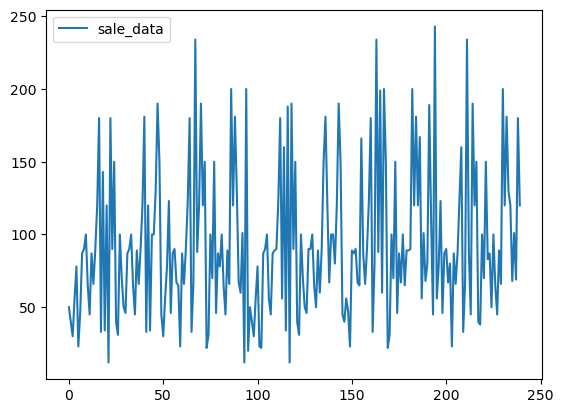

In [116]:
data.plot()

In [117]:
data['date']=pd.to_datetime(data['date'])
data['month']=data['date'].dt.month
data['year']=data["date"].dt.year

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SKU_CODE   240 non-null    object        
 1   date       240 non-null    datetime64[ns]
 2   sale_data  240 non-null    float64       
 3   month      240 non-null    int64         
 4   year       240 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 11.2+ KB


In [119]:
result=data.groupby(['SKU_CODE','month','year'])['sale_data'].sum().reset_index()
result

,SKU_CODE,month,year,sale_data
0,bath towel,1,2021,90.0
1,bath towel,1,2022,190.0
2,bath towel,2,2021,86.0
3,bath towel,2,2022,131.0
4,bath towel,3,2021,101.0
...,...,...,...,...
115,shirt,10,2022,154.0
116,shirt,11,2021,132.0
117,shirt,11,2022,200.0
118,shirt,12,2021,270.0


In [120]:
s_c=data.SKU_CODE.unique().tolist()
yer=data.year.unique().tolist()
mnth=data.month.unique().tolist()
month=['jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov','dec']


In [121]:
col_name=['sku_code','jan_21','feb_21','mar_21','apr_21',"may_21","jun_21","jul_21","aug_21","sep_21","oct_21","nov_21","dec_21",'jan_22','feb_22','mar_22','apr_22',"may_22","jun_22","jul_22","aug_22","sep_22","oct_22","nov_22","dec_22"]
in_df=pd.DataFrame(columns=col_name)                                               
for i in s_c:
    l_21=[]
    l_22=[]
    for j in range(len(result)):
        if(result.SKU_CODE[j]==i):
            if(j%2==0):
                l_21.append(result.sale_data[j])
            else:
                l_22.append(result.sale_data[j])
    val={'sku_code':i,'jan_21':l_21[0],'feb_21':l_21[1],'mar_21':l_21[2],'apr_21':l_21[3],"may_21":l_21[4],"jun_21":l_21[5],"jul_21":l_21[6],"aug_21":l_21[7],"sep_21":l_21[8],"oct_21":l_21[9],"nov_21":l_21[10],"dec_21":l_21[11],'jan_22':l_22[0],'feb_22':l_22[1],'mar_22':l_22[2],'apr_22':l_22[3],"may_22":l_22[4],"jun_22":l_22[5],"jul_22":l_22[6],"aug_22":l_22[7],"sep_22":l_22[8],"oct_22":l_22[9],"nov_22":l_22[10],"dec_22":l_22[11]}
    in_df=in_df.append(val,ignore_index=True)
in_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2750903265.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  in_df=in_df.append(val,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2750903265.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  in_df=in_df.append(val,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2750903265.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  in_df=in_df.append(val,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2750903265.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  in_df=in_df.append(val,ignore_index=True)
C:\Users\ASUS\AppData\Local\

,sku_code,jan_21,feb_21,mar_21,apr_21,may_21,jun_21,jul_21,aug_21,sep_21,...,mar_22,apr_22,may_22,jun_22,jul_22,aug_22,sep_22,oct_22,nov_22,dec_22
0,shirt,90.0,86.0,101.0,133.0,190.0,110.0,153.0,210.0,213.0,...,120.0,133.0,190.0,110.0,155.0,210.0,214.0,154.0,200.0,320.0
1,jeans,195.0,86.0,201.0,133.0,157.0,88.0,153.0,213.0,213.0,...,220.0,133.0,178.0,110.0,155.0,320.0,311.0,127.0,113.0,220.0
2,bath towel,90.0,86.0,101.0,109.0,190.0,101.0,176.0,213.0,236.0,...,120.0,136.0,190.0,115.0,149.0,240.0,301.0,167.0,180.0,310.0
3,bed sheet,195.0,96.0,70.0,176.0,157.0,231.0,153.0,213.0,213.0,...,220.0,133.0,167.0,154.0,179.0,320.0,301.0,223.0,169.0,269.0
4,pillow,155.0,299.0,201.0,133.0,157.0,103.0,153.0,210.0,193.0,...,220.0,170.0,150.0,110.0,155.0,320.0,311.0,188.0,170.0,300.0


In [122]:
x=np.array(in_df.iloc[:,1:])
y=np.array(in_df.iloc[:,0])
out_size=len(x)
in_size=len(x[0])
x

array([[ 90.,  86., 101., 133., 190., 110., 153., 210., 213., 177., 132.,
        270., 190., 131., 120., 133., 190., 110., 155., 210., 214., 154.,
        200., 320.],
       [195.,  86., 201., 133., 157.,  88., 153., 213., 213., 301., 208.,
        310., 172., 131., 220., 133., 178., 110., 155., 320., 311., 127.,
        113., 220.],
       [ 90.,  86., 101., 109., 190., 101., 176., 213., 236., 194., 200.,
        280., 190., 131., 120., 136., 190., 115., 149., 240., 301., 167.,
        180., 310.],
       [195.,  96.,  70., 176., 157., 231., 153., 213., 213., 314., 287.,
        260., 172., 131., 220., 133., 167., 154., 179., 320., 301., 223.,
        169., 269.],
       [155., 299., 201., 133., 157., 103., 153., 210., 193., 301., 133.,
        310., 190., 138., 220., 170., 150., 110., 155., 320., 311., 188.,
        170., 300.]])

In [123]:
def specified_percent_over_last_year():
    print("the Specified Percent Over Last Year for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    for i in range(0,out_size):
        l=[]
        for j in range(in_size-12,in_size-6):
            l.append(x[i][j]*1.1)
        d_1={'sku_code':y[i],'jan_23':l[0],'feb_23':l[1],'mar_23':l[2],'apr_23':l[3],'may_23':l[4],'jun_23':l[5]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/specified_percent_over_last_year.csv")

In [124]:
specified_percent_over_last_year()

the Specified Percent Over Last Year for next 6 months(jan-jun)2023 are:
     sku_code  jan_23  feb_23  mar_23  apr_23  may_23  jun_23
0       shirt   209.0   144.1   132.0   146.3   209.0   121.0
1       jeans   189.2   144.1   242.0   146.3   195.8   121.0
2  bath towel   209.0   144.1   132.0   149.6   209.0   126.5
3   bed sheet   189.2   144.1   242.0   146.3   183.7   169.4
4      pillow   209.0   151.8   242.0   187.0   165.0   121.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\843595688.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\843595688.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\843595688.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\843595688.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Lo

In [125]:
def calculated_percent_over_last_year():
    n=4
    print("the calculated Percent Over Last Year for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    for i in range(0,out_size):
        l=[]
        a=0
        b=0
        for j in range(in_size-n-12,in_size-12):
            b+=x[i][j] 
        for j in range(in_size-n,in_size):
            a+=x[i][j]
        percent=a/b
        for j in range(in_size-12,in_size-6):
            l.append(x[i][j]*percent)
        d_1={'sku_code':y[i],'jan_23':l[0],'feb_23':l[1],'mar_23':l[2],'apr_23':l[3],'may_23':l[4],'jun_23':l[5]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/calculated_percent_over_last_year.csv")
         

In [126]:
calculated_percent_over_last_year()


the calculated Percent Over Last Year for next 6 months(jan-jun)2023 are:
     sku_code      jan_23      feb_23      mar_23      apr_23      may_23  \
0       shirt  213.030303  146.878788  134.545455  149.121212  213.030303   
1       jeans  128.500000   97.869186  164.360465   99.363372  132.982558   
2  bath towel  200.021978  137.909890  126.329670  143.173626  200.021978   
3   bed sheet  154.063315  117.338920  197.057728  119.130354  149.584730   
4      pillow  196.488794  142.712914  227.513340  175.805763  155.122732   

       jun_23  
0  123.333333  
1   82.180233  
2  121.065934  
3  137.940410  
4  113.756670  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2142647118.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2142647118.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2142647118.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2142647118.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppDat

In [127]:
def last_year_to_this_year():
    print("the Last Year to This Year for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    for i in range(0,out_size):
        l=[]
        for j in range(in_size-12,in_size-6):
            l.append(x[i][j])
        d_1={'sku_code':y[i],'jan_23':l[0],'feb_23':l[1],'mar_23':l[2],'apr_23':l[3],'may_23':l[4],'jun_23':l[5]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/last_year_to_this_year.csv")

In [128]:
last_year_to_this_year()

the Last Year to This Year for next 6 months(jan-jun)2023 are:
     sku_code  jan_23  feb_23  mar_23  apr_23  may_23  jun_23
0       shirt   190.0   131.0   120.0   133.0   190.0   110.0
1       jeans   172.0   131.0   220.0   133.0   178.0   110.0
2  bath towel   190.0   131.0   120.0   136.0   190.0   115.0
3   bed sheet   172.0   131.0   220.0   133.0   167.0   154.0
4      pillow   190.0   138.0   220.0   170.0   150.0   110.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\3212187330.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\3212187330.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\3212187330.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\3212187330.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppDat

In [129]:
def moving_average():
    print("the Moving Average to This Year for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    n=4
    for i in range(0,out_size):
        l=[]
        l_final=[]
        for j in range(in_size-n,in_size):
            l.append(x[i][j])
        for j in range(0,6):
            val=sum(l)/n
            l.pop(0)
            l.append(val)
            l_final.append(val)
        d_1={'sku_code':y[i],'jan_23':l_final[0],'feb_23':l_final[1],'mar_23':l_final[2],'apr_23':l_final[3],'may_23':l_final[4],'jun_23':l_final[5]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/moving_average.csv")

In [130]:
moving_average()

the Moving Average to This Year for next 6 months(jan-jun)2023 are:
     sku_code  jan_23    feb_23      mar_23      apr_23      may_23  \
0       shirt  222.00  224.0000  241.500000  251.875000  234.843750   
1       jeans  192.75  163.1875  172.234375  187.042969  178.803711   
2  bath towel  239.50  224.1250  238.406250  253.007812  238.759766   
3   bed sheet  240.50  225.3750  225.968750  240.210938  233.013672   
4      pillow  242.25  225.0625  234.328125  250.410156  238.012695   

       jun_23  
0  238.054688  
1  175.317139  
2  238.574707  
3  231.142090  
4  236.953369  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\1274099137.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\1274099137.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\1274099137.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\1274099137.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppDat

In [131]:
def linear_approximation():
    print("the Linear Approximation for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    n=4
    for i in range(0,out_size):
        l=[]
        a=x[i][in_size-n]
        b=x[i][in_size-1]
        approx=abs((b-a))/n-1
        for j in range(1,7):
            val=b+(j*approx)
            l.append(val)
        d_1={'sku_code':y[i],'jan_23':l[0],'feb_23':l[1],'mar_23':l[2],'apr_23':l[3],'may_23':l[4],'jun_23':l[5]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/linear_approximation.csv")

In [132]:
linear_approximation()

the Linear Approximation for next 6 months(jan-jun)2023 are:
     sku_code  jan_23  feb_23  mar_23  apr_23  may_23  jun_23
0       shirt  345.50   371.0  396.50   422.0  447.50   473.0
1       jeans  241.75   263.5  285.25   307.0  328.75   350.5
2  bath towel  311.25   312.5  313.75   315.0  316.25   317.5
3   bed sheet  276.00   283.0  290.00   297.0  304.00   311.0
4      pillow  301.75   303.5  305.25   307.0  308.75   310.5


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\544129725.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\544129725.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\544129725.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\544129725.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Lo

In [133]:
def least_square_regression():
    print("the Least Square Regression for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    n=4
    for i in range(0,out_size):
        l=[]
        p=[]
        q=[]
        pq=[]
        p2=[]
        for j in range(1,n+1):
            p.append(j)
        for j in range(in_size-n,in_size):
            q.append(x[i][j])
        for j in range(n):
            pq.append(p[j]*q[j])
        for j in p:
            p2.append(j**2)
        b=abs((n*sum(pq))-(sum(p)*sum(q)))/abs((n*(sum(p2)))-((sum(p))**2))
        a=(sum(q)/n)-abs(b*(sum(p)/n))
        for j in range(n+1,n+1+6):
            l.append(a+(j*b))
        d_1={'sku_code':y[i],'jan_23':l[0],'feb_23':l[1],'mar_23':l[2],'apr_23':l[3],'may_23':l[4],'jun_23':l[5]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/least_square_regression.csv")

In [134]:
least_square_regression()

the Least Square Regression for next 6 months(jan-jun)2023 are:
     sku_code  jan_23  feb_23  mar_23  apr_23  may_23  jun_23
0       shirt   313.0   349.4   385.8   422.2   458.6   495.0
1       jeans   264.5   293.2   321.9   350.6   379.3   408.0
2  bath towel   249.5   253.5   257.5   261.5   265.5   269.5
3   bed sheet   278.0   293.0   308.0   323.0   338.0   353.0
4      pillow   255.0   260.1   265.2   270.3   275.4   280.5


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2431858299.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2431858299.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2431858299.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2431858299.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppDat

In [135]:
def second_degree_approximation():
    print("the Second Degree Approximation for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    n=4
    for i in range(0,out_size):
        q1=x[i][in_size-9]+x[i][in_size-8]+x[i][in_size-7]
        q2=x[i][in_size-6]+x[i][in_size-5]+x[i][in_size-4]
        q3=x[i][in_size-3]+x[i][in_size-2]+x[i][in_size-1]
        a=q3-3*(q2-q1)
        c=((q3-q2)+(q1-q2))/2
        b=(q2-q1)-3*c
        l=[]
        for j in range(n,n+2):
            val=(a+(b*j)+(c*(j**2)))
            l.append(val)
        d_1={'sku_code':y[i],'jan_23':l[0],'feb_23':l[0],'mar_23':l[0],'apr_23':l[1],'may_23':l[1],'jun_23':l[1]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/second_degree_approximation.csv")

In [136]:
second_degree_approximation()

the Second Degree Approximation for next 6 months(jan-jun)2023 are:


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\4199908499.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\4199908499.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\4199908499.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\4199908499.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)


     sku_code  jan_23  feb_23  mar_23  apr_23  may_23  jun_23
0       shirt   718.0   718.0   718.0   711.0   711.0   711.0
1       jeans  -557.0  -557.0  -557.0 -2265.0 -2265.0 -2265.0
2  bath towel   342.0   342.0   342.0  -255.0  -255.0  -255.0
3   bed sheet    37.0    37.0    37.0 -1072.0 -1072.0 -1072.0
4      pillow    46.0    46.0    46.0 -1050.0 -1050.0 -1050.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\4199908499.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)


In [137]:
def weighted_moving_average():
    print("the Weighted Moving Average for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    n=4
    for i in range(0,out_size):
        l=[]
        l_final=[]
        for j in range(in_size-n,in_size):
            l.append(x[i][j])
        for j in range(0,6):
            val=((l[0]*0.10)+(l[1]*0.15)+(l[2]*0.25)+(l[3]*0.50))/(0.10+0.15+0.25+0.50)
            l.pop(0)
            l.append(val)
            l_final.append(val)
        d_1={'sku_code':y[i],'jan_23':l_final[0],'feb_23':l_final[1],'mar_23':l_final[2],'apr_23':l_final[3],'may_23':l_final[4],'jun_23':l_final[5]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/weighted_moving_average.csv")

In [138]:
weighted_moving_average()

the Weighted Moving Average for next 6 months(jan-jun)2023 are:
     sku_code  jan_23   feb_23   mar_23     apr_23      may_23      jun_23
0       shirt  254.50  252.650  257.950  262.31250  258.991250  259.031250
1       jeans  188.40  178.850  180.825  185.38500  183.566250  183.138125
2  bath towel  255.15  248.775  252.675  257.80375  254.901875  254.680625
3   bed sheet  240.30  235.050  234.850  239.13250  237.566250  237.298750
4      pillow  251.80  245.200  247.550  252.84500  250.270000  249.998750


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\871928620.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\871928620.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\871928620.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\871928620.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Lo

In [139]:
def linear_smoothing():
    print("the Linear Smoothing for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    n=4
    for i in range(0,out_size):
        l=[]
        t=[]
        l_final=[]
        s=((n**2)+n)/2
        for j in range(1,n+1):
            t.append(j/s)
        for j in range(in_size-n,in_size):
            l.append(x[i][j])
        for j in range(0,6):
            val=0
            for k in range(n):
                val+=l[k]*t[k]
            val=val/(sum(t))
            l.pop(0)
            l.append(val)
            l_final.append(val)
        d_1={'sku_code':y[i],'jan_23':l_final[0],'feb_23':l_final[1],'mar_23':l_final[2],'apr_23':l_final[3],'may_23':l_final[4],'jun_23':l_final[5]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/linear_smoothing.csv")

In [140]:
linear_smoothing()

the Linear Smoothing for next 6 months(jan-jun)2023 are:
     sku_code  jan_23  feb_23   mar_23    apr_23     may_23      jun_23
0       shirt   240.2  247.48  255.052  256.3048  252.55352  253.671248
1       jeans   178.4  172.66  177.884  180.6316  177.98984  178.228216
2  bath towel   241.5  242.30  249.370  251.7380  248.11620  248.871880
3   bed sheet   233.0  230.00  232.600  235.5400  233.29600  233.500400
4      pillow   239.7  238.68  244.382  247.2968  243.93932  244.509168


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2005706155.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2005706155.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2005706155.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2005706155.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppDat

In [141]:
def exponential_smoothing():
    print("the Exponential Smoothing for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    n=4
    for i in range(0,out_size):
        val=x[i][in_size-n]
        l1=[]
        l2=[]
        l2.append(val)
        alpha=0.3
        for j in range(in_size-n+1,in_size):
            l1.append(x[i][j])
        for j in range(0,n-1):
            val=(alpha*(l1[j]))+((1-alpha)*l2[j])
            l2.append(val)
        d_1={'sku_code':y[i],'jan_23':l2[-1],'feb_23':l2[-1],'mar_23':l2[-1],'apr_23':l2[-1],'may_23':l2[-1],'jun_23':l2[-1]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/exponential_smoothing.csv")

In [142]:
exponential_smoothing()

the Exponential Smoothing for next 6 months(jan-jun)2023 are:
     sku_code   jan_23   feb_23   mar_23   apr_23   may_23   jun_23
0       shirt  234.040  234.040  234.040  234.040  234.040  234.040
1       jeans  215.072  215.072  215.072  215.072  215.072  215.072
2  bath towel  258.592  258.592  258.592  258.592  258.592  258.592
3   bed sheet  252.214  252.214  252.214  252.214  252.214  252.214
4      pillow  260.009  260.009  260.009  260.009  260.009  260.009


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\904508133.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\904508133.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\904508133.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\904508133.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Lo

In [143]:
def exponential_smoothing_with_tands():
    print("the Exponential Smoothing with Trend and Seasonality for next 6 months(jan-jun)2023 are:")
    col_name=['sku_code','jan_23','feb_23','mar_23','apr_23','may_23','jun_23']
    out_df = pd.DataFrame(columns = col_name)
    n=4
    for i in range(0,out_size):
        l1=[]
        l2=[]
        a=[]
        s=[]
        t=[]
        l_final=[]
        alpha=0.3
        beta=0.4
        for j in range(0,12):
            l1.append(x[i][j])
            l2.append(x[i][j+12])
        sum_l1=sum(l1)
        sum_l2=sum(l2)
        for j in range(0,12):
            if(j==0):
                t1=0
                val=((l1[j]+l2[j])/(sum_l1+sum_l2))*12
                s.append(val)
                a.append((l2[j]/val))
                t.append(t1)
            else:
                val=((l1[j]+l2[j])/(sum_l1+sum_l2))*12
                s.append(val)
                p=(alpha*(l2[j]/val)+(1-alpha)*(a[j-1]+t[j-1]))
                a.append(p)
                z=(beta*(a[j]-a[j-1]))+((1-beta)*(t[j-1]))
                t.append(z)
        for j in range(0,6):
            l_final.append((a[j]+t[j]*j)*s[j])
        d_1={'sku_code':y[i],'jan_23':l_final[0],'feb_23':l_final[1],'mar_23':l_final[2],'apr_23':l_final[3],'may_23':l_final[4],'jun_23':l_final[5]}
        out_df=out_df.append(d_1,ignore_index=True)
    print(out_df)
    out_df.to_csv("./output/exponential_smoothing_with_tands.csv")

In [144]:
exponential_smoothing_with_tands()

the Exponential Smoothing with Trend and Seasonality for next 6 months(jan-jun)2023 are:
     sku_code  jan_23      feb_23      mar_23      apr_23      may_23  \
0       shirt   190.0  140.425000  126.614311  124.394539  142.910199   
1       jeans   172.0  114.006158  234.186530  149.314229  193.350136   
2  bath towel   190.0  140.425000  126.614311  123.483918  154.895554   
3   bed sheet   172.0  116.724414  194.941441  193.204559  196.060045   
4      pillow   190.0  197.546667  182.606516  140.981905  140.970764   

       jun_23  
0   69.220368  
1  119.793075  
2   78.836485  
3  179.351662  
4  103.114059  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\1804773287.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\1804773287.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\1804773287.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\1804773287.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df=out_df.append(d_1,ignore_index=True)
C:\Users\ASUS\AppDat